# NLP practicing

### this is practicing what can be found in the book: Hands-On Natural Language Processing with Python
### I added some other simple examples

In [3]:
import nltk

# modules that are required:
# 1 brown
# 2 gutenberg
# 3 max_ne_chunker
# 4 movie_reviews
# 5 product_reviews_1
# 6 punkt
# 7 treebank
# 8 twitter_samples
# 9 universal_tagset
# 10 webtext
# 11 wordnet
# 12 words
#nltk.download() # pop up window which helps downloading the modules or:
nltk.download('brown') # this way can be also
nltk.download('gutenberg')
nltk.download('max_ne_chunker')
nltk.download('movie_reviews')
nltk.download('product_reviews_1')
nltk.download('punkt')
nltk.download('treebank')
nltk.download('twitter_samples')
nltk.download('universal_tagset')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('words')

In [4]:
import matplotlib.pyplot as plt

# Tokenization

In [5]:
from nltk.corpus import twitter_samples as ts

In [6]:
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [7]:
samples_tw = ts.strings('tweets.20150430-223406.json')

In [8]:
samples_tw[500]

'RT @Battsby: Ed Miliband appears to be dying on his lying arse here. \n\n#bbcqt \n\nThe spray-tanned mask is slipping.'

In [9]:
from nltk.tokenize import word_tokenize as wtoken

In [10]:
wtoken(samples_tw[500])

['RT',
 '@',
 'Battsby',
 ':',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 '.',
 '#',
 'bbcqt',
 'The',
 'spray-tanned',
 'mask',
 'is',
 'slipping',
 '.']

In [11]:
from nltk.tokenize import wordpunct_tokenize as wtoken2

In [12]:
wtoken2(samples_tw[500])

['RT',
 '@',
 'Battsby',
 ':',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 '.',
 '#',
 'bbcqt',
 'The',
 'spray',
 '-',
 'tanned',
 'mask',
 'is',
 'slipping',
 '.']

In [13]:
from nltk import regexp_tokenize

In [14]:
patn = '\w+'
regexp_tokenize(samples_tw[500],patn)

['RT',
 'Battsby',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 'bbcqt',
 'The',
 'spray',
 'tanned',
 'mask',
 'is',
 'slipping']

In [15]:
#regular expression that detects words along with a few punctuation characters:
patn = '\w+|[!,\-,]' 
regexp_tokenize(samples_tw[500],patn)

['RT',
 'Battsby',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 'bbcqt',
 'The',
 'spray',
 '-',
 'tanned',
 'mask',
 'is',
 'slipping']

# Stemming

In [16]:
from nltk.stem import PorterStemmer

In [17]:
stemming = PorterStemmer()
print(stemming.stem("enjoying"),stemming.stem("enjoys"),stemming.stem("enjoyable"))

enjoy enjoy enjoy


In [18]:
# Stemming does not always produce a stem that is a word by itself, as shown in the following example:
print(stemming.stem("variation"),stemming.stem("variate"))

variat variat


In [19]:
#we can create custom stemmers, using the following regular expressions:
from nltk.stem import RegexpStemmer
regexp_stemmer = RegexpStemmer("able$|ing$",min=4)

In [20]:
print(regexp_stemmer.stem("flyable"),regexp_stemmer.stem("flying"))

fly fly


# Removing stop words

In [21]:
from nltk.corpus import stopwords
sw_l = stopwords.words('english')

In [22]:
print(len(sw_l),sw_l[20:40])

179 ['himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


In [23]:
example_text = "This is an example sentence to test stopwords"
example_text_without_stopwords=[word for word in example_text.split() if word not in sw_l]
example_text_without_stopwords

['This', 'example', 'sentence', 'test', 'stopwords']

In [24]:
from nltk.corpus import gutenberg
words_in_hamlet = gutenberg.words('shakespeare-hamlet.txt')
words_in_hamlet_without_sw = [word for word in words_in_hamlet if word not in sw_l]

In [25]:
len(words_in_hamlet_without_sw)*100.0/len(words_in_hamlet)

69.26124197002142

In [26]:
# gutenberg content
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [27]:
bible = gutenberg.words('bible-kjv.txt')
words_in_bible_without_sw = [word for word in bible if word not in sw_l]

In [28]:
len(words_in_bible_without_sw)*100.0/len(bible)

62.6017410508443

In [29]:
len(words_in_bible_without_sw)

632687

In [30]:
vocabulary = set(words_in_bible_without_sw)
len(vocabulary)

13647

In [31]:
frequency_dist = nltk.FreqDist(words_in_bible_without_sw)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)[0:30]

['shall',
 'unto',
 'LORD',
 'thou',
 'said',
 'thee',
 'upon',
 'Israel',
 'king',
 'hath',
 'people',
 'came',
 'house',
 'come',
 'children',
 'land',
 'also',
 'shalt',
 'hand',
 'made',
 'went',
 'saying',
 'Then',
 'even',
 'saith',
 'every',
 'things',
 'sons',
 'Lord',
 'David']

In [32]:
from wordcloud import WordCloud

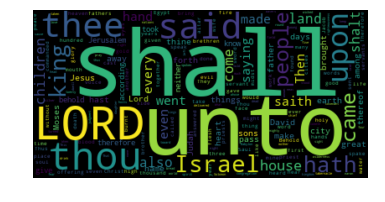

In [33]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
emma = gutenberg.words('austen-emma.txt')
words_in_emma_without_sw = [word for word in emma if word not in sw_l]

In [35]:
print("no stop words ratio:",len(words_in_emma_without_sw)*100.0/len(emma),"\nvocabulary:",len(set(words_in_emma_without_sw)))

no stop words ratio: 58.33277034927531 
vocabulary: 7682


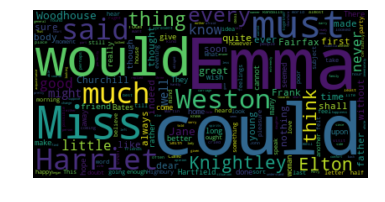

In [36]:
frequency_dist = nltk.FreqDist(words_in_emma_without_sw)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Exploratory analysis of text

In [37]:
from nltk.corpus import webtext
webtext_sentences = webtext.sents('firefox.txt')
# Firefox discussion forum (firefox.txt)

In [38]:
webtext_sentences = webtext.sents('firefox.txt')
webtext_words = webtext.words('firefox.txt')
print(len(webtext_sentences),len(webtext_words))

1142 102457


In [39]:
vocabulary = set(webtext_words)
len(vocabulary)

8296

In [40]:
frequency_dist = nltk.FreqDist(webtext_words)
sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)[0:30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

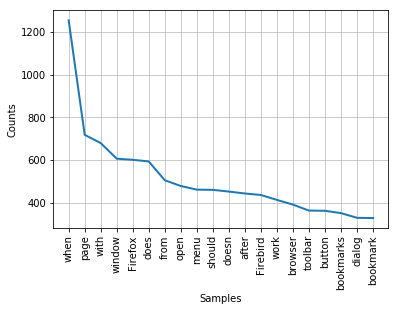

In [41]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(20,cumulative=False)
plt.show()

In [42]:
#!pip install wordcloud

In [43]:
from wordcloud import WordCloud

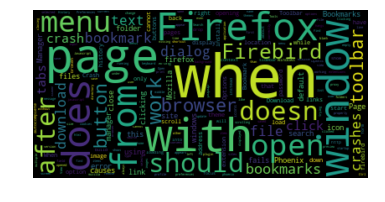

In [44]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
# without stopwords
words_in_webtext_without_sw = [word for word in webtext_words if word not in sw_l]


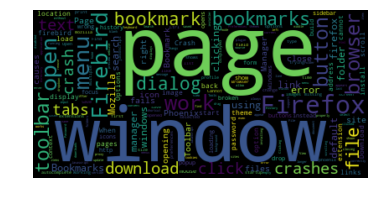

In [46]:
frequency_dist2 = nltk.FreqDist(words_in_webtext_without_sw)
large_words2 = dict([(k,v) for k,v in frequency_dist2.items() if len(k)>3])
frequency_dist3 = nltk.FreqDist(large_words2)
wcloud = WordCloud().generate_from_frequencies(frequency_dist3)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# POS tagging
#### categorizing the words in a sentence into specific syntactic or grammatical functions
* VERB: Verbs (all tenses and modes)
* NOUN: Nouns (common and proper)
* PRON: Pronouns
* ADJ: Adjectives
* ADV: Adverbs
* ADP: Adpositions (prepositions and postpositions)
* CONJ: Conjunctions
* DET: Determiners
* NUM: Cardinal numbers
* PRT: Particles or other function words
* X-other: Foreign words, typos, abbreviations
* .: Punctuation

In [47]:
from nltk.corpus import brown
brown.fileids()[:3]

['ca01', 'ca02', 'ca03']

In [48]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [49]:
brown.words(categories='adventure')

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]

In [50]:
brown.words(fileids=['ca01'])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [51]:
brown.sents(categories=['adventure', 'adventure'])

[['Dan', 'Morgan', 'told', 'himself', 'he', 'would', 'forget', 'Ann', 'Turner', '.'], ['He', 'was', 'well', 'rid', 'of', 'her', '.'], ...]

In [52]:
brown.tagged_words()[:10]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

In [53]:
# In the first example, the word left is a verb, whereas it is a noun in the second example.
text1 = nltk.word_tokenize("I left the room")
text2 = nltk.word_tokenize("Left of the room")
nltk.pos_tag(text1,tagset='universal')

[('I', 'PRON'), ('left', 'VERB'), ('the', 'DET'), ('room', 'NOUN')]

In [54]:
nltk.pos_tag(text2,tagset='universal')

[('Left', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('room', 'NOUN')]

In [55]:
example_sent = nltk.word_tokenize("The company is located in South Africa")
example_sent

['The', 'company', 'is', 'located', 'in', 'South', 'Africa']

In [56]:
tagged_sent = nltk.pos_tag(example_sent)
tagged_sent

[('The', 'DT'),
 ('company', 'NN'),
 ('is', 'VBZ'),
 ('located', 'VBN'),
 ('in', 'IN'),
 ('South', 'NNP'),
 ('Africa', 'NNP')]

In [57]:
# ne_chunk recognize South Africa as a Geo Political Entity (GPE)
print(nltk.ne_chunk(tagged_sent))

(S
  The/DT
  company/NN
  is/VBZ
  located/VBN
  in/IN
  (GPE South/NNP Africa/NNP))


# Training our own tagger
### predict the POS tag for a given word in a sentence

In [58]:
# Potential predictive Features: extract the word prefixes and suffixes, and previous and neighboring words in the text for the training
# function: st:sentence ix: ixth word
# The function converts the text input into a dictionary of features: d_ft.
def sentence_features(st, ix):
    d_ft = {}
    d_ft['word'] = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last'] = len(st) - ix
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0] # boolean: first letter is capital
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric'] = st[ix].isdigit()
    return d_ft

def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

In [87]:
# Packages needed for the next example
import re
from nltk import word_tokenize
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [86]:
# perform how the sentence_features function works
text = "My leg was hurt severly last time when I was running."
tagged_text=re.findall(r"[\w']+", text) # split works only one separator, so here regular expressions need to be used
sentence_features(tagged_text, 10)


{'word': 'running',
 'dist_from_first': 10,
 'dist_from_last': 1,
 'capitalized': False,
 'prefix1': 'r',
 'prefix2': 'ru',
 'prefix3': 'run',
 'suffix1': 'g',
 'suffix2': 'ng',
 'suffix3': 'ing',
 'prev_word': 'was',
 'next_word': '',
 'numeric': False}

In [85]:
# perform how get_untagged_sentence works: here we need to have a tokenized input

text2 = word_tokenize(text)
tagged_text = nltk.pos_tag(text2)
get_untagged_sentence(tagged_text)

['My',
 'leg',
 'was',
 'hurt',
 'severly',
 'last',
 'time',
 'when',
 'I',
 'was',
 'running',
 '.']

In [59]:
# We will now use the treebank tagged sentences, with the universal tags as the labeled or training data:
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')


In [60]:
# extract the features for each tagged sentence in the corpus, along with the training labels
def ext_ft(tg_sent):
    sent, tag = [], []
    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg),index))
            tag.append(tg[index][1])
    return sent, tag
X,y = ext_ft(tagged_sentences)


In [93]:
# X is huge list of dictionary - y is the list of labels
print(len(X),"\n",X[1971],"\n", y[1971])

100676 
 {'word': 'few', 'dist_from_first': 8, 'dist_from_last': 12, 'capitalized': False, 'prefix1': 'f', 'prefix2': 'fe', 'prefix3': 'few', 'suffix1': 'w', 'suffix2': 'ew', 'suffix3': 'few', 'prev_word': 'a', 'next_word': 'meetings', 'numeric': False} 
 ADJ


In [100]:
# DictVectorizer to convert the feature-value dictionary to training vectors with automatic one-hot encoder
n_sample = 50000
#dict_vectorizer = DictVectorizer(sparse=False)
dict_vectorizer = DictVectorizer(sparse=True) # Changed this otherwise memory error may happen
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[0:n_sample]

In [101]:
# taining-test split 80%-20%
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=123)

In [102]:
X_transformed.shape

(50000, 30857)

In [103]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

C:\Users\Gergo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags = rf.predict(features)
    return zip(sentence, tags)

In [113]:
test_sentence = "My love is always mad at me."
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)

('My', 'NOUN')
('love', 'NOUN')
('is', 'VERB')
('always', 'ADV')
('mad', 'VERB')
('at', 'ADP')
('me.', 'NOUN')


In [106]:
predictions = rf.predict(X_test)

In [107]:
accuracy_score(y_test,predictions)

0.9427

In [108]:
conf_matrix = confusion_matrix(y_test,predictions)

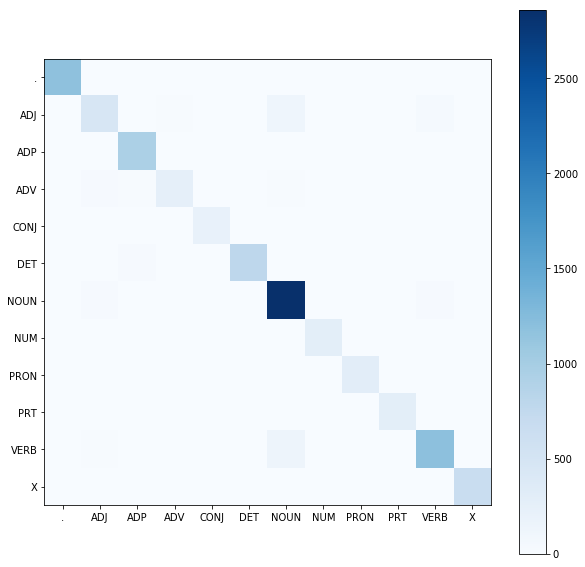

In [110]:
plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(rf.classes_)),rf.classes_)
plt.yticks(np.arange(len(rf.classes_)),rf.classes_)
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

In [111]:
feature_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
sorted_features = sorted(feature_list,key=lambda x: x[1], reverse=True)
print(sorted_features[0:20])

[('dist_from_last', 0.022145505410777182), ('word=,', 0.02115702534406198), ('prefix1=,', 0.01895165898689121), ('prefix1=*', 0.018924095531209262), ('word=the', 0.018855674161668372), ('capitalized', 0.017255762389958833), ('suffix1=d', 0.016165489417424676), ('suffix3=the', 0.014749301901676346), ('suffix2=.', 0.012908775924483593), ('suffix3=to', 0.010143312021421954), ('dist_from_first', 0.009353516009994366), ('next_word=,', 0.009179651093224276), ('suffix3=of', 0.008316021915995675), ('suffix2=ed', 0.007826474092527734), ('prefix2=0', 0.007224616661836264), ('prefix3=a', 0.007032170159213286), ('prefix3=in', 0.006683143389655093), ('suffix1=1', 0.006202278109448641), ('suffix1=,', 0.00609021712586349), ('prefix2=of', 0.00602356642513125)]


##### let's fine tune the model

# QURAN

In [61]:
# http://www.gutenberg.org/cache/epub/3434/pg3434.txt
# download and play
k_path = 'C:\\datasets\\pg3434.txt'

In [62]:
file = open(k_path, mode='r', encoding="utf8") # 'r' is to read
text = file.read()
file.close()

In [63]:
print(text.split()[1000:1030])

['course,', 'the', 'prophet', 'par', 'excellence,', 'and', 'the', 'Koran', 'is', 'regarded', 'by', 'the', 'orthodox', 'as', 'nothing', 'less', 'than', 'the', 'eternal', 'utterance', 'of', 'Allah.', 'The', 'eulogy', 'pronounced', 'by', 'Carlyle', 'on', 'Muhammed', 'in']


In [64]:
words_in_koran_without_sw = [word for word in text.split() if word not in sw_l]

In [65]:
print("no stop words ratio:",len(words_in_koran_without_sw)*100.0/len(text.split()),"\nvocabulary:",len(set(words_in_koran_without_sw)))

no stop words ratio: 56.113031787189094 
vocabulary: 23415


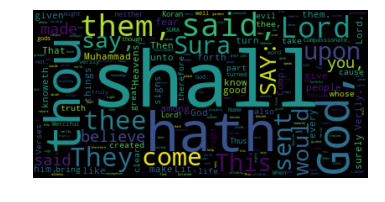

In [66]:
frequency_dist = nltk.FreqDist(words_in_koran_without_sw)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

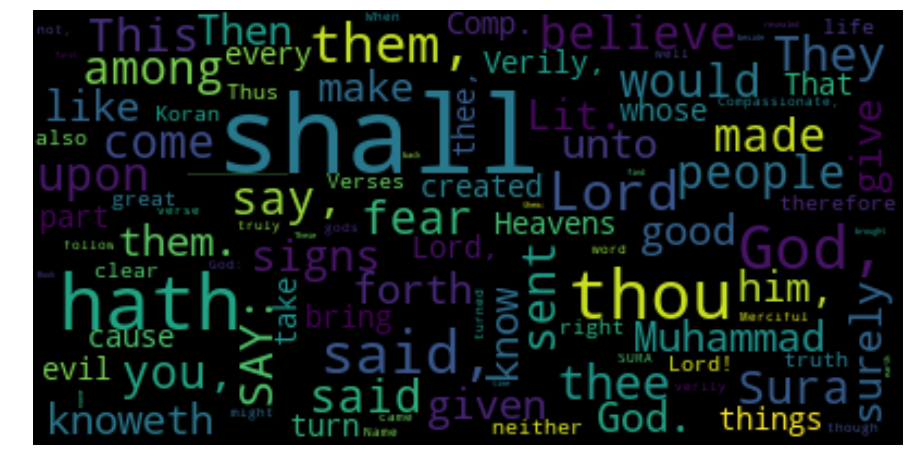

In [67]:
wcloud = WordCloud(max_font_size=50, max_words=100).generate_from_frequencies(frequency_dist)
plt.figure(figsize=[16,8])
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
frequency_dist['Muhammad']

201

In [69]:
frequency_dist['Jewish']

33

In [70]:
print('angel freq:',frequency_dist['angel'],'\nAngel freq:',frequency_dist['Angel'])

angel freq: 12 
Angel freq: 6
